In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_backup = pd.read_csv('D:/Desktop/Plan/Road_to_Swedbank/Credit_risk/accepted_2007_to_2018Q4.csv')

C:\Users\thdam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Explore dataset

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [6]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


## General Preprocesing

#### emp_length

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

In [10]:
type(loan_data['emp_length_int'][0])

str

In [11]:
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])

In [12]:
type(loan_data['emp_length_int'][0])

numpy.float64

#### earliest_cr_line

In [13]:
loan_data['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
3    Sep-2008
4    Jun-1998
Name: earliest_cr_line, dtype: object

In [14]:
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%Y')

In [15]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
loan_data['earliest_cr_line_date'].head()

0   2003-08-01
1   1999-12-01
2   2000-08-01
3   2008-09-01
4   1998-06-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [17]:
loan_data['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2020-11-20')-loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [18]:
loan_data['mths_since_earliest_cr_line'].max()

1053.0

#### term

In [19]:
loan_data['term'].head()

0     36 months
1     36 months
2     60 months
3     60 months
4     60 months
Name: term, dtype: object

In [20]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [21]:
type(loan_data['term_int'][0])

numpy.float64

#### issue_d

In [22]:
loan_data['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
3    Dec-2015
4    Dec-2015
Name: issue_d, dtype: object

In [23]:
loan_data['issue_d_date']=pd.to_datetime(loan_data['issue_d'],format='%b-%Y')

In [24]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
loan_data['mths_since_issue_d']= round(pd.to_numeric((pd.to_datetime('2020-11-20')-loan_data['issue_d_date'])/np.timedelta64(1,'M')))

In [26]:
loan_data['mths_since_issue_d'].max()

162.0

#### Preprocessing few discrete variables

In [27]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [28]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [29]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [30]:
loan_data=pd.concat([loan_data,loan_data_dummies],axis=1) #concat by column

#### check for missing values and clean

In [31]:
pd.options.display.max_rows= None 
loan_data.isnull().sum()

id                                                                       0
member_id                                                          2260701
loan_amnt                                                               33
funded_amnt                                                             33
funded_amnt_inv                                                         33
term                                                                    33
int_rate                                                                33
installment                                                             33
grade                                                                   33
sub_grade                                                               33
emp_title                                                           167002
emp_length                                                          146940
home_ownership                                                          33
annual_inc               

In [32]:
pd.options.display.max_rows= 100

In [33]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [34]:
loan_data['total_rev_hi_lim'].isnull().sum()

33

In [35]:
loan_data.dropna(subset=['funded_amnt'], inplace=True)

In [36]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [37]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [38]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# PD model

## Data preparation

### Dependent variable

In [39]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [40]:
loan_data['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [41]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

In [42]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

### Split data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [45]:
loan_data_inputs_train.shape

(1808534, 284)

In [46]:
loan_data_targets_train.shape

(1808534,)

In [47]:
loan_data_inputs_test.shape

(452134, 284)

In [48]:
loan_data_targets_test.shape

(452134,)

### Preprocessing Dicrete Variables

Woe = ln(%good / %bad)

Information Value= sum((%good-%bad)*woe)

IV < 0.02 : no predictive power
0.02 < IV < 0.1: weak

In [49]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [50]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [51]:
df_inputs_prepr.drop(['member_id', 'pymnt_plan','sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1',
       'sub_grade:F2', 'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F5',
       'sub_grade:G1', 'sub_grade:G2', 'sub_grade:G3', 'sub_grade:G4',
       'sub_grade:G5','next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint','url', 'desc','revol_bal',
       'revol_util','out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog','inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths','sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag',
       'hardship_type', 'hardship_reason', 'hardship_status',
       'deferral_term', 'hardship_amount', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status',
       'settlement_date', 'settlement_amount', 'settlement_percentage',
       'settlement_term'], axis=1, inplace=True)

In [52]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [53]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9750,0.598872,0.005391,5839.0,3911.0,0.003705,0.016814,-1.512492,NaN,NaN,0.478346
1,F,33480,0.636947,0.018512,21325.0,12155.0,0.013532,0.052256,-1.351119,0.038076,0.161373,0.478346
2,E,108483,0.717652,0.059984,77853.0,30630.0,0.049401,0.131682,-0.980416,0.080704,0.370703,0.478346
3,D,259725,0.796335,0.143611,206828.0,52897.0,0.131242,0.227411,-0.549718,0.078683,0.430698,0.478346
4,C,520045,0.856341,0.287551,445336.0,74709.0,0.282586,0.321184,-0.128030,0.060007,0.421688,0.478346
5,B,530523,0.913508,0.293344,484637.0,45886.0,0.307525,0.197270,0.443982,0.057167,0.572012,0.478346
6,A,346528,0.964167,0.191607,334111.0,12417.0,0.212009,0.053382,1.379148,0.050659,0.935167,0.478346


### Preprocessing Discrete Variables: Visualizing Results

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

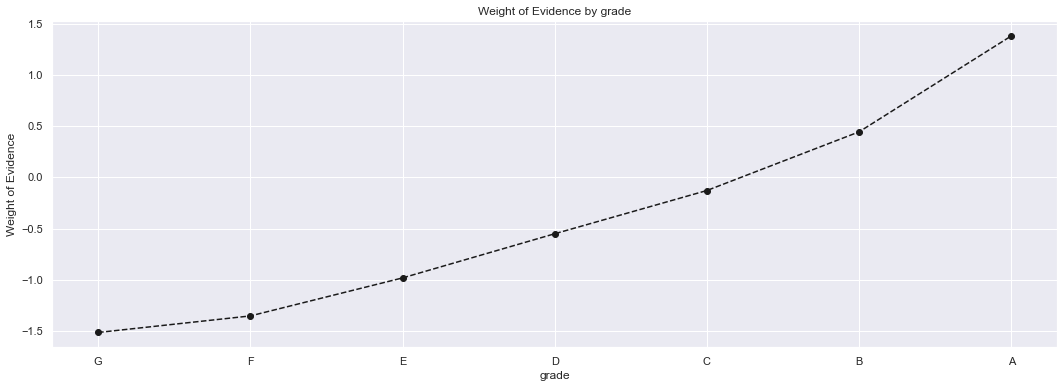

In [56]:
plot_by_woe(df_temp)

#### home_ownership

In [57]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,147,0.795918,0.000081,117.0,30.0,0.000074,0.000129,-0.552282,NaN,NaN,0.025499
1,RENT,715486,0.850189,0.395617,608298.0,107188.0,0.385993,0.460816,-0.177178,0.054270,0.375104,0.025499
2,NONE,48,0.854167,0.000027,41.0,7.0,0.000026,0.000030,-0.145597,0.003978,0.031581,0.025499
3,OWN,202866,0.871437,0.112172,176785.0,26081.0,0.112178,0.112126,0.000469,0.017271,0.146065,0.025499
4,MORTGAGE,889185,0.888383,0.491661,789937.0,99248.0,0.501252,0.426680,0.161073,0.016946,0.160604,0.025499
5,ANY,802,0.936409,0.000443,751.0,51.0,0.000477,0.000219,0.776322,0.048026,0.615249,0.025499


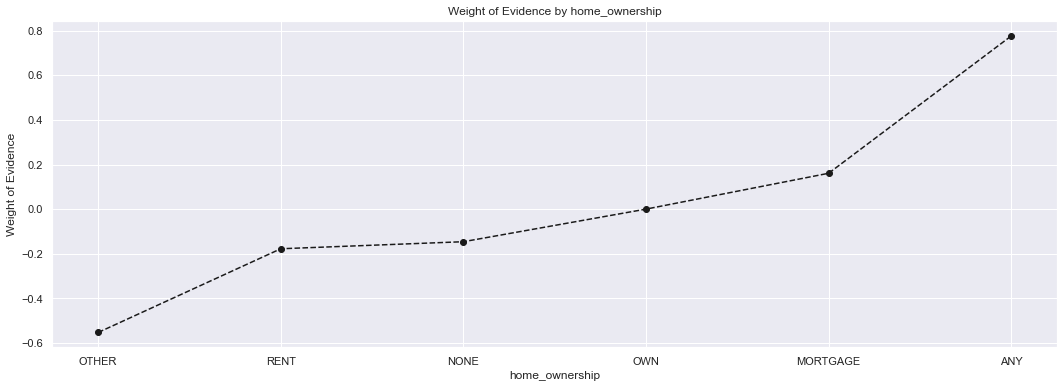

In [58]:
plot_by_woe(df_temp)

In [59]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

#### addr_state

In [60]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,12,0.750000,0.000007,9.0,3.0,0.000006,0.000013,-0.814646,NaN,NaN,0.014122
1,AL,21857,0.844535,0.012085,18459.0,3398.0,0.011713,0.014608,-0.220893,0.094535,0.593753,0.014122
2,MS,10099,0.847114,0.005584,8555.0,1544.0,0.005429,0.006638,-0.201119,0.002579,0.019774,0.014122
3,AR,13651,0.848070,0.007548,11577.0,2074.0,0.007346,0.008916,-0.193717,0.000956,0.007402,0.014122
4,OK,16520,0.850242,0.009134,14046.0,2474.0,0.008913,0.010636,-0.176757,0.002172,0.016960,0.014122
5,NV,26208,0.854052,0.014491,22383.0,3825.0,0.014203,0.016444,-0.146515,0.003810,0.030242,0.014122
6,LA,20645,0.854493,0.011415,17641.0,3004.0,0.011194,0.012915,-0.142977,0.000440,0.003538,0.014122
7,NY,149002,0.858297,0.082388,127888.0,21114.0,0.081151,0.090772,-0.112040,0.003805,0.030938,0.014122
8,HI,8546,0.859232,0.004725,7343.0,1203.0,0.004659,0.005172,-0.104329,0.000935,0.007710,0.014122
9,NM,9634,0.861117,0.005327,8296.0,1338.0,0.005264,0.005752,-0.088661,0.001884,0.015668,0.014122


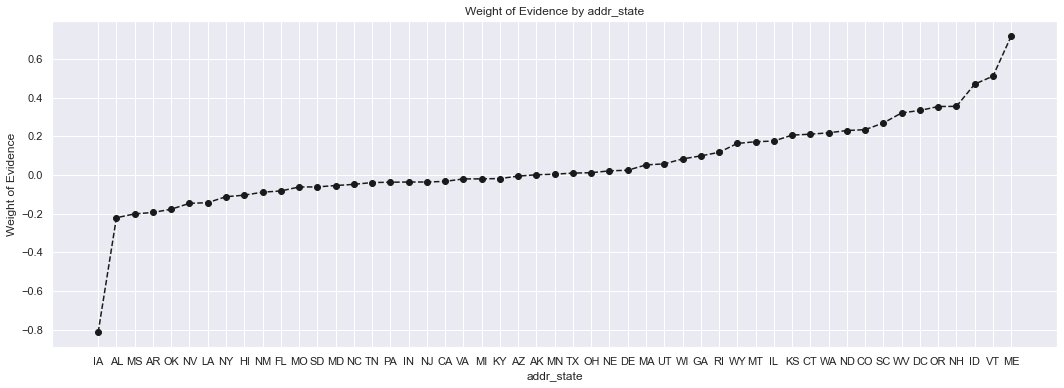

In [61]:
plot_by_woe(df_temp)

In [62]:
df_inputs_prepr['addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA'] = sum([df_inputs_prepr['addr_state:LA'], df_inputs_prepr['addr_state:AR'],
                                              df_inputs_prepr['addr_state:AL'], df_inputs_prepr['addr_state:MS'],
                                              df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:NM'],
                                                          df_inputs_prepr['addr_state:SD'],df_inputs_prepr['addr_state:NV'],
                                                               df_inputs_prepr['addr_state:IA']])

df_inputs_prepr['addr_state:MO_NC_MD_IN_AK_NE_NJ'] = sum([df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:NC'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:IN'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:MI_PA_MN_TN_VA_HI'] = sum([df_inputs_prepr['addr_state:MI'], df_inputs_prepr['addr_state:PA'],
                                              df_inputs_prepr['addr_state:MN'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:VA'],df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:OH_WI_AZ_MA_UT_DE'] = sum([df_inputs_prepr['addr_state:OH'], df_inputs_prepr['addr_state:WI'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:DE']])

df_inputs_prepr['addr_state:GA_IL_WY_RI'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:IL'],
                                              df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:RI']])

df_inputs_prepr['addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME'] = sum([df_inputs_prepr['addr_state:MT'], 
                                              df_inputs_prepr['addr_state:WA'],df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:OR'],df_inputs_prepr['addr_state:ND'],
                                              df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:CT'],
                                              df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:VT'],df_inputs_prepr['addr_state:ID'],
                                                                               df_inputs_prepr['addr_state:ME']])


#### verification_status

In [63]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,503662,0.830811,0.278492,418448.0,85214.0,0.265525,0.366346,-0.321872,NaN,NaN,0.083319
1,Source Verified,708826,0.866277,0.391934,614040.0,94786.0,0.389637,0.407498,-0.044820,0.035466,0.277051,0.083319
2,Not Verified,596046,0.911743,0.329574,543441.0,52605.0,0.344839,0.226156,0.421851,0.045466,0.466672,0.083319


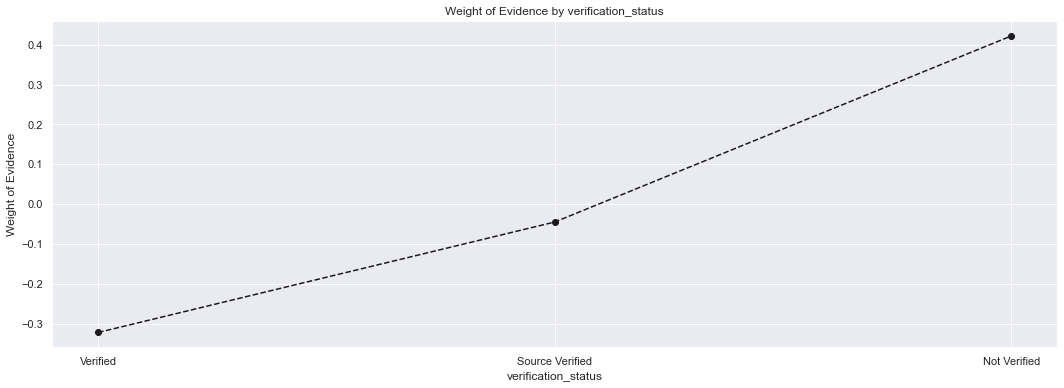

In [64]:
plot_by_woe(df_temp)

#### purpose

In [65]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,350,0.794286,0.000194,278.0,72.0,0.000176,0.000310,-0.562303,NaN,NaN,0.023496
1,small_business,19781,0.795460,0.010938,15735.0,4046.0,0.009985,0.017394,-0.555100,0.001175,0.007204,0.023496
2,moving,12302,0.843196,0.006802,10373.0,1929.0,0.006582,0.008293,-0.231054,0.047736,0.324046,0.023496
3,renewable_energy,1164,0.845361,0.000644,984.0,180.0,0.000624,0.000774,-0.214589,0.002165,0.016465,0.023496
4,debt_consolidation,1022437,0.860942,0.565340,880259.0,142178.0,0.558565,0.611242,-0.090122,0.015581,0.124467,0.023496
5,medical,21981,0.864337,0.012154,18999.0,2982.0,0.012056,0.012820,-0.061466,0.003395,0.028656,0.023496
6,other,111682,0.869997,0.061753,97163.0,14519.0,0.061654,0.062419,-0.012327,0.005660,0.049140,0.023496
7,house,11263,0.874367,0.006228,9848.0,1415.0,0.006249,0.006083,0.026880,0.004370,0.039207,0.023496
8,vacation,12429,0.876177,0.006872,10890.0,1539.0,0.006910,0.006616,0.043454,0.001809,0.016573,0.023496
9,wedding,1900,0.876842,0.001051,1666.0,234.0,0.001057,0.001006,0.049601,0.000665,0.006148,0.023496


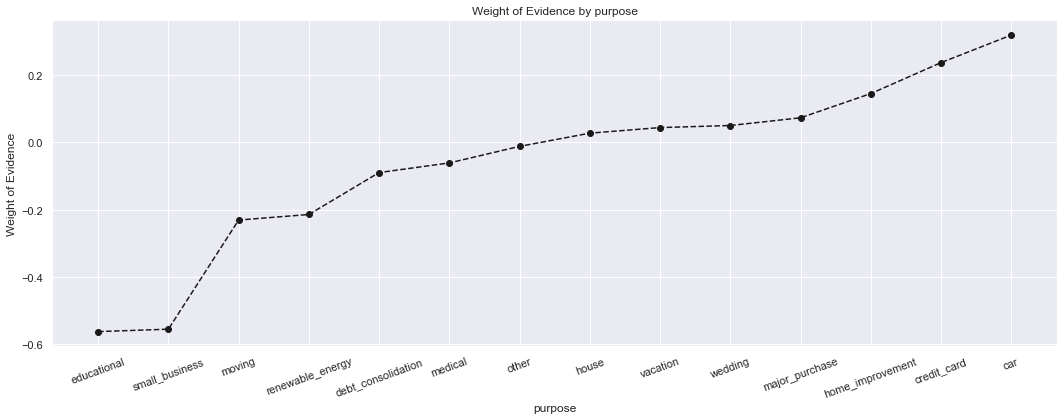

In [66]:
plot_by_woe(df_temp,20)

In [67]:
df_inputs_prepr['purpose:educ__ren_en__sm_b__mov'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                          df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving']])
                                
df_inputs_prepr['purpose:med__oth__house__wedd'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                       df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:wedding']])
df_inputs_prepr['purpose:major_purch__vacation__home_impr__car'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:vacation']])

#### initial_list_status

In [68]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,580266,0.840468,0.320849,487695.0,92571.0,0.309465,0.397975,-0.251544,NaN,NaN,0.034405
1,w,1228268,0.885991,0.679151,1088234.0,140034.0,0.690535,0.602025,0.137168,0.045523,0.388712,0.034405


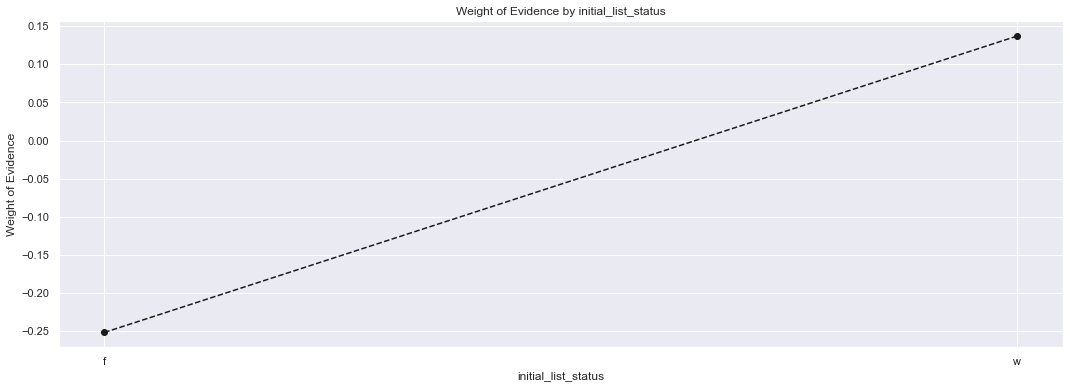

In [69]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables

In [70]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.

#### term

In [71]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36.0,1287731,0.890417,0.71203,1146617.0,141114.0,0.727582,0.606668,0.181745,NaN,NaN,0.066389
1,60.0,520803,0.824327,0.28797,429312.0,91491.0,0.272418,0.393332,-0.367315,0.06609,0.54906,0.066389


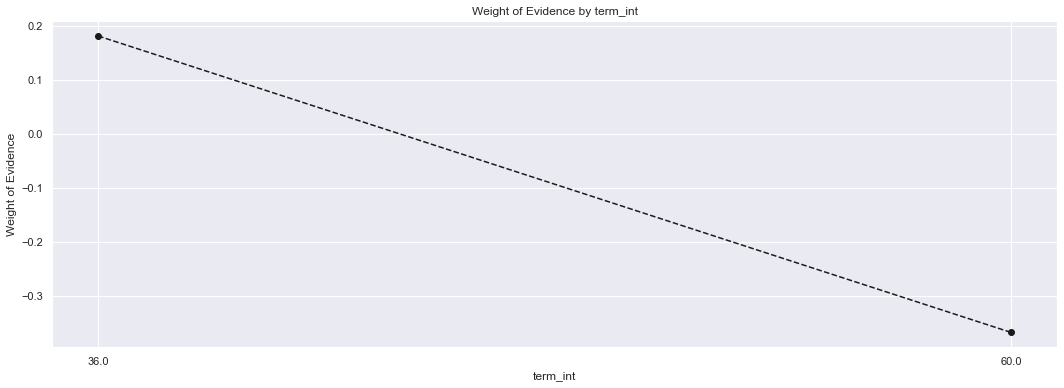

In [72]:
plot_by_woe(df_temp)

In [73]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

#### emp_length

In [74]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,269317,0.859860,0.148915,231575.0,37742.0,0.146945,0.162258,-0.099128,NaN,NaN,0.004385
1,1.0,118815,0.867029,0.065697,103016.0,15799.0,0.065368,0.067922,-0.038321,0.007168,0.060807,0.004385
2,2.0,162787,0.871691,0.090010,141900.0,20887.0,0.090042,0.089796,0.002737,0.004663,0.041058,0.004385
3,3.0,144771,0.870920,0.080049,126084.0,18687.0,0.080006,0.080338,-0.004138,0.000771,0.006875,0.004385
4,4.0,109206,0.873029,0.060384,95340.0,13866.0,0.060498,0.059612,0.014751,0.002109,0.018889,0.004385
5,5.0,111835,0.871400,0.061837,97453.0,14382.0,0.061838,0.061830,0.000134,0.001629,0.014617,0.004385
6,6.0,82396,0.871596,0.045560,71816.0,10580.0,0.045571,0.045485,0.001883,0.000196,0.001749,0.004385
7,7.0,74018,0.866114,0.040927,64108.0,9910.0,0.040679,0.042604,-0.046234,0.005482,0.048117,0.004385
8,8.0,73530,0.859853,0.040657,63225.0,10305.0,0.040119,0.044303,-0.099188,0.006261,0.052954,0.004385
9,9.0,63401,0.862983,0.035057,54714.0,8687.0,0.034719,0.037347,-0.072967,0.003130,0.026221,0.004385


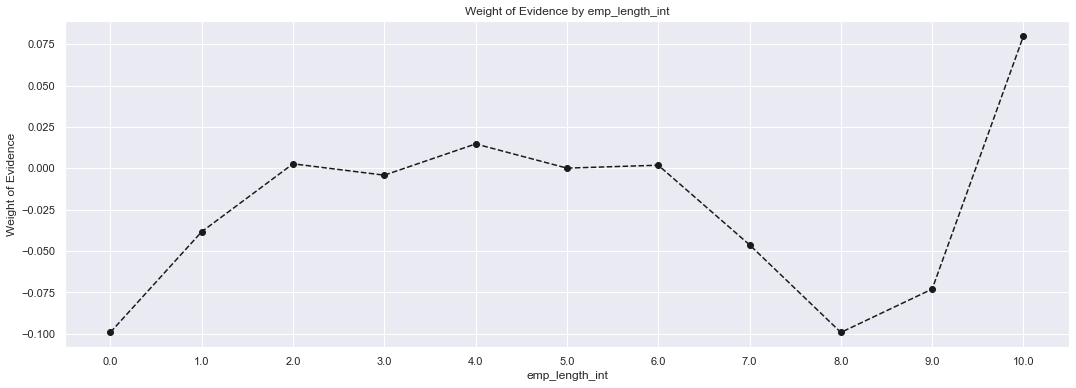

In [75]:
plot_by_woe(df_temp)

In [76]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### mths_since_issue_d

In [77]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 68.,  61., 117.,  43.,  27.,  40.,  37.,  31.,  60.,  74.,  49.,
        53.,  34.,  97.,  46.,  64.,  63.,  58.,  42.,  41.,  76.,  26.,
        84.,  71.,  56.,  70.,  62., 126.,  30.,  59.,  67.,  55.,  81.,
       128.,  38.,  47.,  28.,  90.,  75.,  82.,  52.,  50.,  35.,  48.,
        57.,  29.,  24.,  66.,  51.,  36.,  65.,  83.,  96.,  80.,  86.,
        25., 107.,  44.,  98.,  87.,  54.,  79., 127.,  39.,  72.,  32.,
        45.,  99.,  92.,  77., 116.,  33.,  89., 131., 106.,  69.,  73.,
        78., 137.,  91., 109., 100.,  93., 104.,  85.,  95., 103., 101.,
       108., 134.,  94., 146., 139., 105., 113.,  88., 158., 121., 102.,
       133., 125., 110., 115., 118., 132., 153., 114., 111., 122., 112.,
       142., 124., 119., 160., 152., 123., 148., 130., 120., 143., 141.,
       138., 135., 129., 154., 145., 157., 144., 149., 136., 140., 155.,
       156., 151., 161., 162., 150., 147., 159.])

In [78]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [79]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.862, 26.76]",102659,0.992665,0.056764,101906.0,753.0,0.064664,0.003237,2.994482,NaN,NaN,0.457784
1,"(26.76, 29.52]",102557,0.978422,0.056707,100344.0,2213.0,0.063673,0.009514,1.900997,0.014243,1.093486,0.457784
2,"(29.52, 32.28]",104429,0.955367,0.057742,99768.0,4661.0,0.063307,0.020038,1.150359,0.023055,0.750638,0.457784
3,"(32.28, 35.04]",86231,0.939523,0.047680,81016.0,5215.0,0.051408,0.022420,0.829849,0.015844,0.320510,0.457784
4,"(35.04, 37.8]",64306,0.922169,0.035557,59301.0,5005.0,0.037629,0.021517,0.558930,0.017354,0.270919,0.457784
5,"(37.8, 40.56]",97196,0.900726,0.053743,87547.0,9649.0,0.055553,0.041482,0.292063,0.021443,0.266867,0.457784
6,"(40.56, 43.32]",92213,0.886166,0.050988,81716.0,10497.0,0.051853,0.045128,0.138902,0.014561,0.153161,0.457784
7,"(43.32, 46.08]",75655,0.877364,0.041832,66377.0,9278.0,0.042119,0.039887,0.054446,0.008801,0.084456,0.457784
8,"(46.08, 48.84]",54382,0.858648,0.030070,46695.0,7687.0,0.029630,0.033047,-0.109152,0.018716,0.163598,0.457784
9,"(48.84, 51.6]",76581,0.851269,0.042344,65191.0,11390.0,0.041367,0.048967,-0.168673,0.007379,0.059521,0.457784


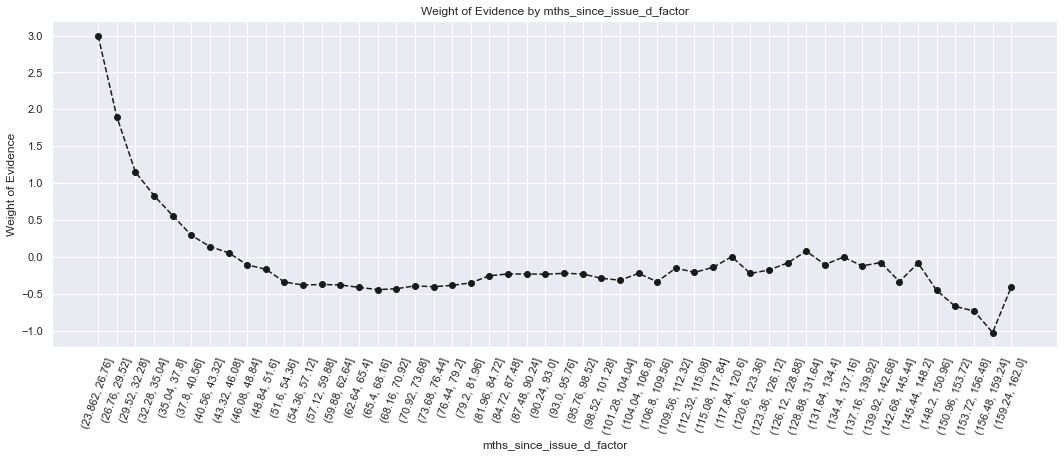

In [80]:
plot_by_woe(df_temp,70)

In [81]:
df_inputs_prepr['mths_since_issue_d:<30'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(30)), 1, 0)
df_inputs_prepr['mths_since_issue_d:30-33'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(30, 34)), 1, 0)
df_inputs_prepr['mths_since_issue_d:33-40'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(33, 41)), 1, 0)
df_inputs_prepr['mths_since_issue_d:41-46'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(41, 47)), 1, 0)
df_inputs_prepr['mths_since_issue_d:46-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(46, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

#### int_rate

In [82]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [83]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",45503,0.978946,0.025160,44545.0,958.0,0.028266,0.004119,1.926149,NaN,NaN,0.469078
1,"(5.824, 6.337]",39253,0.982040,0.021704,38548.0,705.0,0.024460,0.003031,2.088203,0.003093,0.162054,0.469078
2,"(6.337, 6.851]",41319,0.974564,0.022847,40268.0,1051.0,0.025552,0.004518,1.732557,0.007476,0.355647,0.469078
3,"(6.851, 7.364]",76149,0.964661,0.042105,73458.0,2691.0,0.046613,0.011569,1.393542,0.009902,0.339014,0.469078
4,"(7.364, 7.878]",43553,0.960531,0.024082,41834.0,1719.0,0.026546,0.007390,1.278708,0.004131,0.114834,0.469078
5,"(7.878, 8.392]",110704,0.935169,0.061212,103527.0,7177.0,0.065693,0.030855,0.755692,0.025361,0.523016,0.469078
6,"(8.392, 8.905]",29747,0.949104,0.016448,28233.0,1514.0,0.017915,0.006509,1.012478,0.013935,0.256785,0.469078
7,"(8.905, 9.419]",37123,0.900762,0.020527,33439.0,3684.0,0.021219,0.015838,0.292465,0.048342,0.720013,0.469078
8,"(9.419, 9.932]",79753,0.935075,0.044098,74575.0,5178.0,0.047321,0.022261,0.754128,0.034312,0.461663,0.469078
9,"(9.932, 10.446]",63148,0.931811,0.034917,58842.0,4306.0,0.037338,0.018512,0.701588,0.003264,0.052540,0.469078


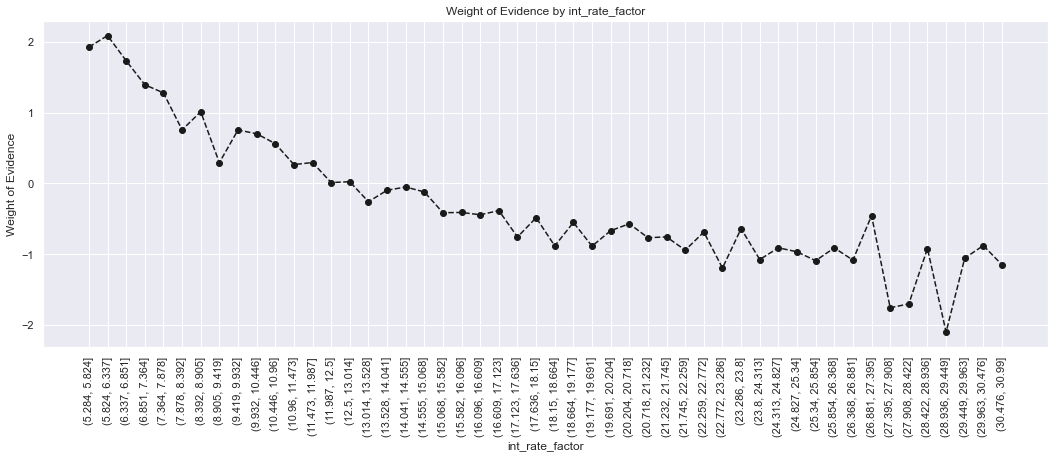

In [84]:
plot_by_woe(df_temp, 90)

In [85]:
df_inputs_prepr['int_rate:<8.392'] = np.where((df_inputs_prepr['int_rate'] <= 8.392), 1, 0)
df_inputs_prepr['int_rate:8.392-11.987'] = np.where((df_inputs_prepr['int_rate'] > 8.392) & (df_inputs_prepr['int_rate'] <= 11.987), 1, 0)
df_inputs_prepr['int_rate:11.987-15.582'] = np.where((df_inputs_prepr['int_rate'] > 11.987) & (df_inputs_prepr['int_rate'] <= 15.582), 1, 0)
df_inputs_prepr['int_rate:15.582-19.177'] = np.where((df_inputs_prepr['int_rate'] > 15.582) & (df_inputs_prepr['int_rate'] <= 19.177), 1, 0)
df_inputs_prepr['int_rate:>19.177'] = np.where((df_inputs_prepr['int_rate'] > 19.177), 1, 0)

#### funded_amnt 
Woe very vary

In [86]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",11357,0.916439,0.006280,10408.0,949.0,0.006604,0.004080,0.481663,NaN,NaN,0.039527
1,"(1290.0, 2080.0]",25687,0.907035,0.014203,23299.0,2388.0,0.014784,0.010266,0.364696,0.009405,0.116967,0.039527
2,"(2080.0, 2870.0]",22342,0.895578,0.012354,20009.0,2333.0,0.012697,0.010030,0.235769,0.011457,0.128927,0.039527
3,"(2870.0, 3660.0]",50752,0.897108,0.028063,45530.0,5222.0,0.028891,0.022450,0.252232,0.001530,0.016464,0.039527
4,"(3660.0, 4450.0]",39697,0.892057,0.021950,35412.0,4285.0,0.022471,0.018422,0.198672,0.005050,0.053561,0.039527
5,"(4450.0, 5240.0]",93809,0.891332,0.051870,83615.0,10194.0,0.053058,0.043825,0.191165,0.000725,0.007507,0.039527
6,"(5240.0, 6030.0]",84310,0.893121,0.046618,75299.0,9011.0,0.047781,0.038739,0.209762,0.001788,0.018597,0.039527
7,"(6030.0, 6820.0]",27420,0.876696,0.015161,24039.0,3381.0,0.015254,0.014535,0.048248,0.016425,0.161515,0.039527
8,"(6820.0, 7610.0]",62948,0.883952,0.034806,55643.0,7305.0,0.035308,0.031405,0.117139,0.007256,0.068891,0.039527
9,"(7610.0, 8400.0]",81294,0.878884,0.044950,71448.0,9846.0,0.045337,0.042329,0.068646,0.005068,0.048493,0.039527


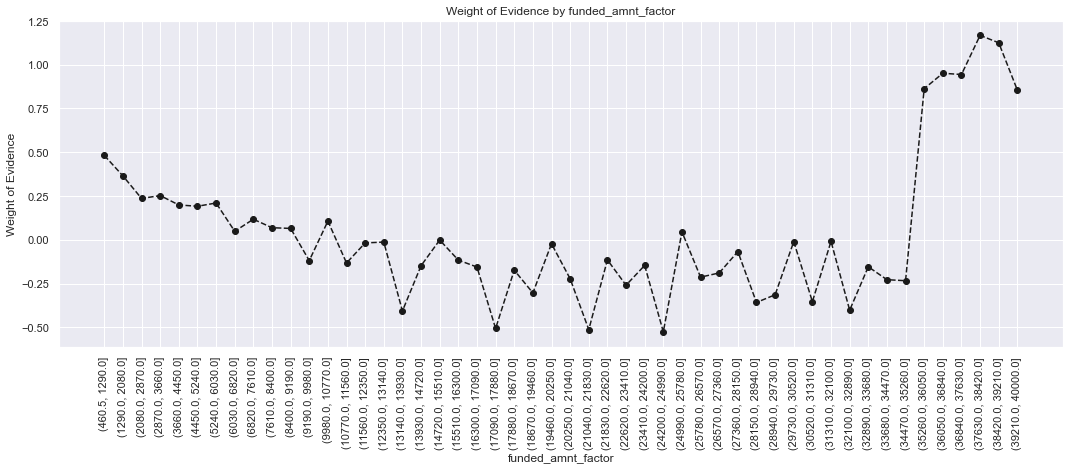

In [87]:
plot_by_woe(df_temp, 90)

#### mths_since_earliest_cr_line

In [88]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.053, 21.06]",22,0.863636,1.216455e-05,19.0,3.0,1.205638e-05,0.000013,-0.067432,NaN,NaN,inf
1,"(21.06, 42.12]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(42.12, 63.18]",220,0.986364,1.216455e-04,217.0,3.0,1.376966e-04,0.000013,2.368027,NaN,NaN,inf
3,"(63.18, 84.24]",17180,0.940570,9.499407e-03,16159.0,1021.0,1.025363e-02,0.004389,0.848436,0.045793,1.519590,inf
4,"(84.24, 105.3]",36585,0.895121,2.022909e-02,32748.0,3837.0,2.078012e-02,0.016496,0.230893,0.045449,0.617544,inf
5,"(105.3, 126.36]",54742,0.879727,3.026871e-02,48158.0,6584.0,3.055848e-02,0.028305,0.076586,0.015394,0.154306,inf
6,"(126.36, 147.42]",56314,0.874418,3.113793e-02,49242.0,7072.0,3.124633e-02,0.030403,0.027345,0.005308,0.049241,inf
7,"(147.42, 168.48]",120654,0.874990,6.671370e-02,105571.0,15083.0,6.698969e-02,0.064844,0.032557,0.000571,0.005212,inf
8,"(168.48, 189.54]",187204,0.871653,1.035115e-01,163177.0,24027.0,1.035434e-01,0.103295,0.002399,0.003336,0.030158,inf
9,"(189.54, 210.6]",204380,0.864742,1.130087e-01,176736.0,27644.0,1.121472e-01,0.118845,-0.058010,0.006911,0.060409,inf


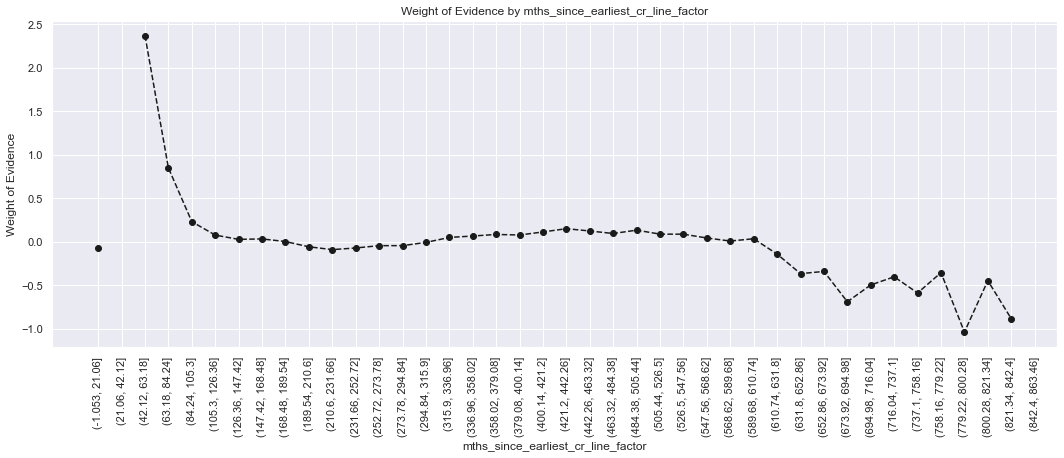

In [89]:
plot_by_woe(df_temp, 90)

In [90]:
df_inputs_prepr['mths_since_earliest_cr_line:<167'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(167)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:167-250'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(167, 251)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:251-355'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(251, 356)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:356-417'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(356, 418)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>417'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(417, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

#### delinq_2yrs

In [91]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1471413,0.874633,8.135943e-01,1286946.0,184467.0,8.166269e-01,0.793048,0.029298,NaN,NaN,inf
1,1.0,225069,0.861700,1.244483e-01,193942.0,31127.0,1.230652e-01,0.133819,-0.083775,0.012933,0.113073,inf
2,2.0,64955,0.851897,3.591583e-02,55335.0,9620.0,3.511262e-02,0.041358,-0.163697,0.009803,0.079922,inf
3,3.0,23650,0.843763,1.307689e-02,19955.0,3695.0,1.266237e-02,0.015885,-0.226759,0.008134,0.063062,inf
4,4.0,10537,0.843694,5.826266e-03,8890.0,1647.0,5.641117e-03,0.007081,-0.227287,0.000070,0.000528,inf
5,5.0,5263,0.835645,2.910092e-03,4398.0,865.0,2.790735e-03,0.003719,-0.287083,0.008049,0.059796,inf
6,6.0,2980,0.849664,1.647743e-03,2532.0,448.0,1.606671e-03,0.001926,-0.181287,0.014019,0.105796,inf
7,7.0,1642,0.838002,9.079177e-04,1376.0,266.0,8.731358e-04,0.001144,-0.269819,0.011662,0.088532,inf
8,8.0,975,0.845128,5.391107e-04,824.0,151.0,5.228662e-04,0.000649,-0.216368,0.007126,0.053451,inf
9,9.0,649,0.842835,3.588542e-04,547.0,102.0,3.470969e-04,0.000439,-0.233782,0.002293,0.017415,inf


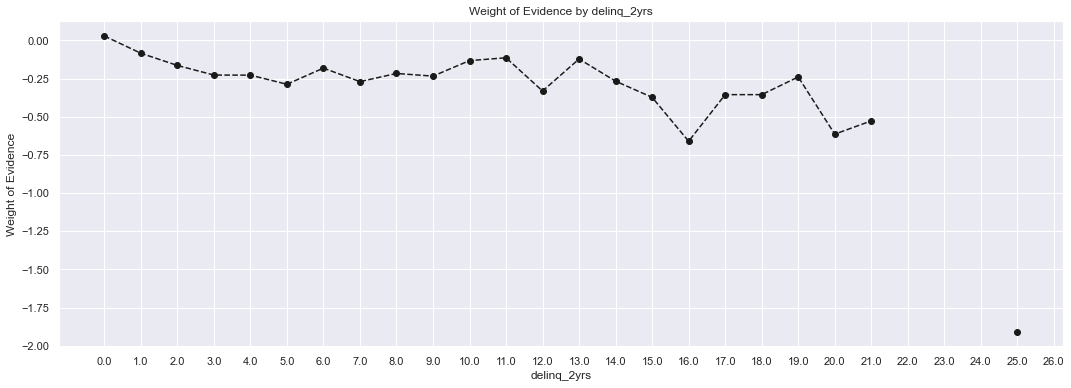

In [92]:
plot_by_woe(df_temp)

In [93]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)

#### inq_last_6mths

In [94]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1104887,0.891143,6.109296e-01,984612.0,120275.0,6.247820e-01,0.517078,0.189208,NaN,NaN,inf
1,1.0,467920,0.855159,2.587289e-01,400146.0,67774.0,2.539112e-01,0.291369,-0.137608,0.035984,0.326816,inf
2,2.0,160186,0.825459,8.857229e-02,132227.0,27959.0,8.390416e-02,0.120199,-0.359477,0.029700,0.221870,inf
3,3.0,55270,0.791297,3.056066e-02,43735.0,11535.0,2.775188e-02,0.049591,-0.580496,0.034162,0.221018,inf
4,4.0,13892,0.754463,7.681360e-03,10481.0,3411.0,6.650680e-03,0.014664,-0.790700,0.036834,0.210204,inf
5,5.0,5026,0.746916,2.779046e-03,3754.0,1272.0,2.382087e-03,0.005468,-0.831027,0.007547,0.040327,inf
6,6.0,984,0.740854,5.440871e-04,729.0,255.0,4.625843e-04,0.001096,-0.862848,0.006062,0.031821,inf
7,7.0,159,0.672956,8.791651e-05,107.0,52.0,6.789646e-05,0.000224,-1.191673,0.067898,0.328825,inf
8,8.0,93,0.666667,5.142287e-05,62.0,31.0,3.934187e-05,0.000133,-1.220111,0.006289,0.028438,inf
9,9.0,41,0.585366,2.267030e-05,24.0,17.0,1.522911e-05,0.000073,-1.568418,0.081301,0.348307,inf


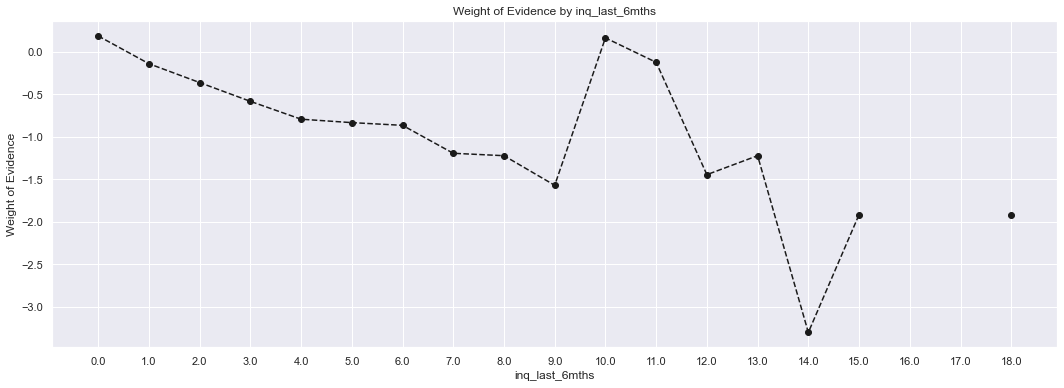

In [95]:
plot_by_woe(df_temp)

In [96]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

#### open_acc

In [97]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,66,0.878788,3.649365e-05,58.0,8.0,3.680369e-05,0.000034,0.067743,NaN,NaN,inf
1,1.0,1321,0.890235,7.304259e-04,1176.0,145.0,7.462265e-04,0.000623,0.179882,0.011447,0.112139,inf
2,2.0,8711,0.891746,4.816608e-03,7768.0,943.0,4.929156e-03,0.004054,0.195443,0.001511,0.015561,inf
3,3.0,25951,0.894802,1.434919e-02,23221.0,2730.0,1.473480e-02,0.011737,0.227497,0.003056,0.032054,inf
4,4.0,54268,0.888479,3.000662e-02,48216.0,6052.0,3.059529e-02,0.026018,0.162044,0.006322,0.065453,inf
5,5.0,86684,0.886242,4.793053e-02,76823.0,9861.0,4.874775e-02,0.042394,0.139658,0.002237,0.022386,inf
6,6.0,116414,0.881423,6.436926e-02,102610.0,13804.0,6.511080e-02,0.059345,0.092719,0.004819,0.046940,inf
7,7.0,138222,0.877255,7.642765e-02,121256.0,16966.0,7.694255e-02,0.072939,0.053434,0.004168,0.039284,inf
8,8.0,150993,0.873994,8.348917e-02,131967.0,19026.0,8.373918e-02,0.081795,0.023487,0.003261,0.029947,inf
9,9.0,156815,0.872519,8.670835e-02,136824.0,19991.0,8.682117e-02,0.085944,0.010155,0.001476,0.013332,inf


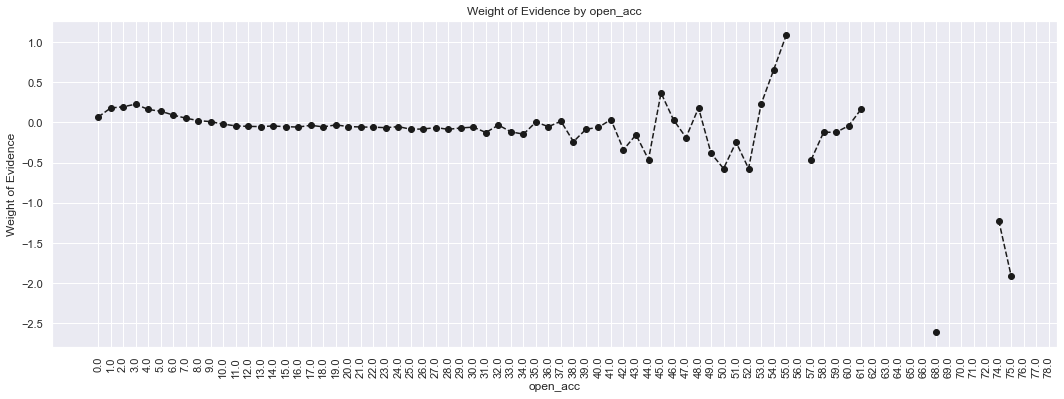

In [98]:
plot_by_woe(df_temp,90)

In [99]:
df_inputs_prepr['open_acc:0-3'] = np.where((df_inputs_prepr['open_acc'] >= 0) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

#### pub_rec

In [100]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1521896,0.876603,8.415081e-01,1334098.0,187798.0,8.465470e-01,0.807369,0.047385,NaN,NaN,inf
1,1.0,244508,0.847404,1.351968e-01,207197.0,37311.0,1.314761e-01,0.160405,-0.198877,0.029199,0.246262,inf
2,2.0,27460,0.819009,1.518357e-02,22490.0,4970.0,1.427095e-02,0.021367,-0.403608,0.028394,0.204731,inf
3,3.0,8430,0.827758,4.661234e-03,6978.0,1452.0,4.427864e-03,0.006242,-0.343438,0.008749,0.060170,inf
4,4.0,3114,0.821130,1.721837e-03,2557.0,557.0,1.622535e-03,0.002395,-0.389234,0.006628,0.045796,inf
5,5.0,1472,0.834239,8.139189e-04,1228.0,244.0,7.792229e-04,0.001049,-0.297285,0.013109,0.091949,inf
6,6.0,763,0.824377,4.218887e-04,629.0,134.0,3.991297e-04,0.000576,-0.366967,0.009862,0.069682,inf
7,7.0,328,0.835366,1.813624e-04,274.0,54.0,1.738657e-04,0.000232,-0.289114,0.010988,0.077853,inf
8,8.0,201,0.865672,1.111397e-04,174.0,27.0,1.104111e-04,0.000116,-0.050040,0.030306,0.239074,inf
9,9.0,109,0.889908,6.026981e-05,97.0,12.0,6.155100e-05,0.000052,0.176546,0.024237,0.226586,inf


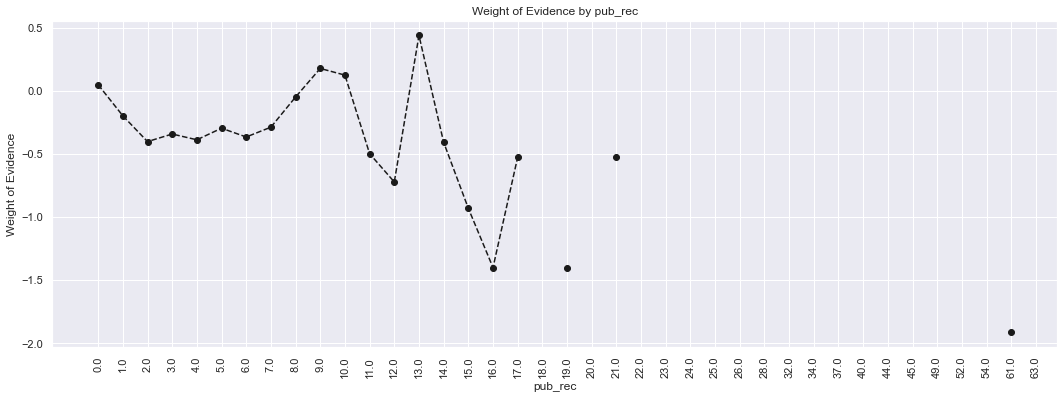

In [101]:
plot_by_woe(df_temp, 90)

In [102]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0), 1, 0)
df_inputs_prepr['pub_rec:1-2'] = np.where((df_inputs_prepr['pub_rec'] >= 1) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:>=3'] = np.where((df_inputs_prepr['pub_rec'] >= 3), 1, 0)

#### total_acc

In [103]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",4487,0.899710,2.481015e-03,4037.0,450.0,2.561664e-03,0.001935,0.280751,NaN,NaN,inf
1,"(3.52, 7.04]",65544,0.884093,3.624151e-02,57947.0,7597.0,3.677006e-02,0.032661,0.118517,0.015617,0.162234,inf
2,"(7.04, 10.56]",111071,0.877844,6.141494e-02,97503.0,13568.0,6.187017e-02,0.058331,0.058911,0.006249,0.059606,inf
3,"(10.56, 14.08]",215939,0.874256,1.194000e-01,188786.0,27153.0,1.197935e-01,0.116734,0.025868,0.003588,0.033043,inf
4,"(14.08, 17.6]",190457,0.872780,1.053102e-01,166227.0,24230.0,1.054787e-01,0.104168,0.012504,0.001476,0.013364,inf
5,"(17.6, 21.12]",262206,0.872467,1.449826e-01,228766.0,33440.0,1.451626e-01,0.143763,0.009688,0.000313,0.002816,inf
6,"(21.12, 24.64]",186082,0.871342,1.028911e-01,162141.0,23941.0,1.028860e-01,0.102926,-0.000385,0.001125,0.010073,inf
7,"(24.64, 28.16]",214483,0.870596,1.185950e-01,186728.0,27755.0,1.184876e-01,0.119322,-0.007021,0.000746,0.006637,inf
8,"(28.16, 31.68]",132027,0.869125,7.300222e-02,114748.0,17279.0,7.281292e-02,0.074285,-0.020012,0.001471,0.012990,inf
9,"(31.68, 35.2]",136673,0.869235,7.557115e-02,118801.0,17872.0,7.538474e-02,0.076834,-0.019044,0.000110,0.000968,inf


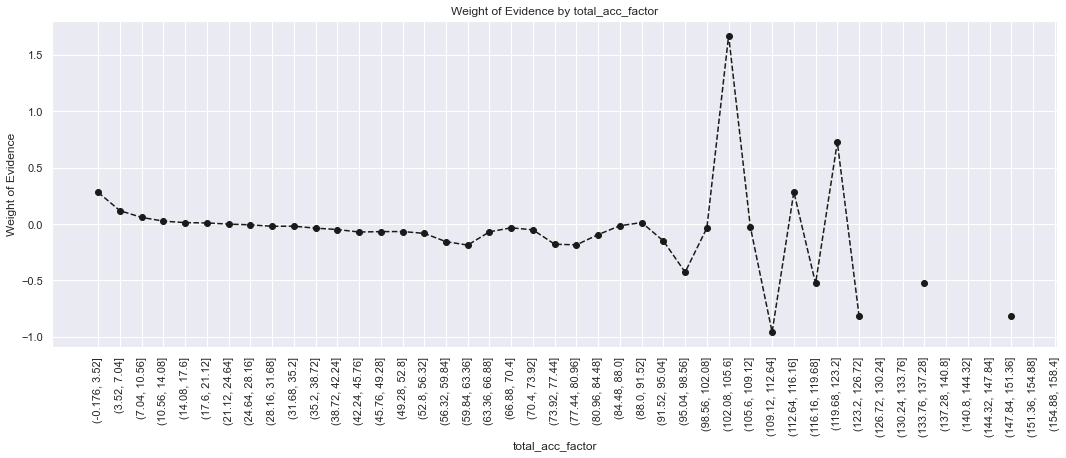

In [104]:
plot_by_woe(df_temp, 90)

In [105]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

#### acc_now_delinq

In [106]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1801453,0.871547,9.960847e-01,1570051.0,231402.0,9.962701e-01,0.994828,0.001448,NaN,NaN,inf
1,1.0,6691,0.831565,3.699682e-03,5564.0,1127.0,3.530616e-03,0.004845,-0.316500,0.039982,0.317949,inf
2,2.0,338,0.810651,1.868917e-04,274.0,64.0,1.738657e-04,0.000275,-0.459013,0.020914,0.142513,inf
3,3.0,38,0.736842,2.101149e-05,28.0,10.0,1.776730e-05,0.000043,-0.883639,0.073809,0.424626,inf
4,4.0,8,0.875000,4.423472e-06,7.0,1.0,4.441824e-06,0.000004,0.032652,0.138158,0.916291,inf
5,5.0,3,0.666667,1.658802e-06,2.0,1.0,1.269093e-06,0.000004,-1.220111,0.208333,1.252763,inf
6,6.0,1,1.000000,5.529340e-07,1.0,0.0,6.345464e-07,0.000000,inf,0.333333,inf,inf
7,7.0,1,1.000000,5.529340e-07,1.0,0.0,6.345464e-07,0.000000,inf,0.000000,NaN,inf
8,14.0,1,1.000000,5.529340e-07,1.0,0.0,6.345464e-07,0.000000,inf,0.000000,NaN,inf


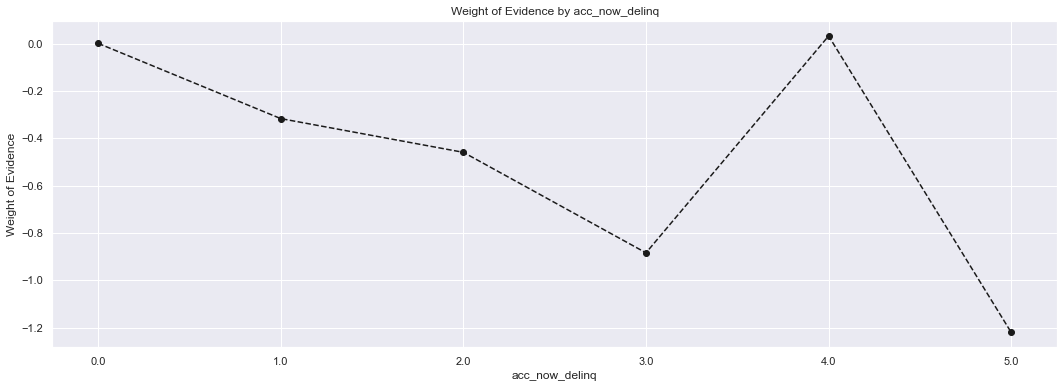

In [107]:
plot_by_woe(df_temp)

In [108]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

#### total_rev_hi_lim

In [109]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",68530,0.846914,0.037893,58039.0,10491.0,0.036828,0.045102,-0.202661,NaN,NaN,inf
1,"(5000.0, 9999.999]",188520,0.848589,0.104239,159976.0,28544.0,0.101512,0.122714,-0.189681,0.001675,0.012980,inf
2,"(9999.999, 14999.998]",233135,0.850434,0.128908,198266.0,34869.0,0.125809,0.149906,-0.175247,0.001845,0.014434,inf
3,"(14999.998, 19999.998]",225517,0.853302,0.124696,192434.0,33083.0,0.122108,0.142228,-0.152525,0.002867,0.022722,inf
4,"(19999.998, 24999.997]",195109,0.859899,0.107882,167774.0,27335.0,0.106460,0.117517,-0.098809,0.006597,0.053716,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


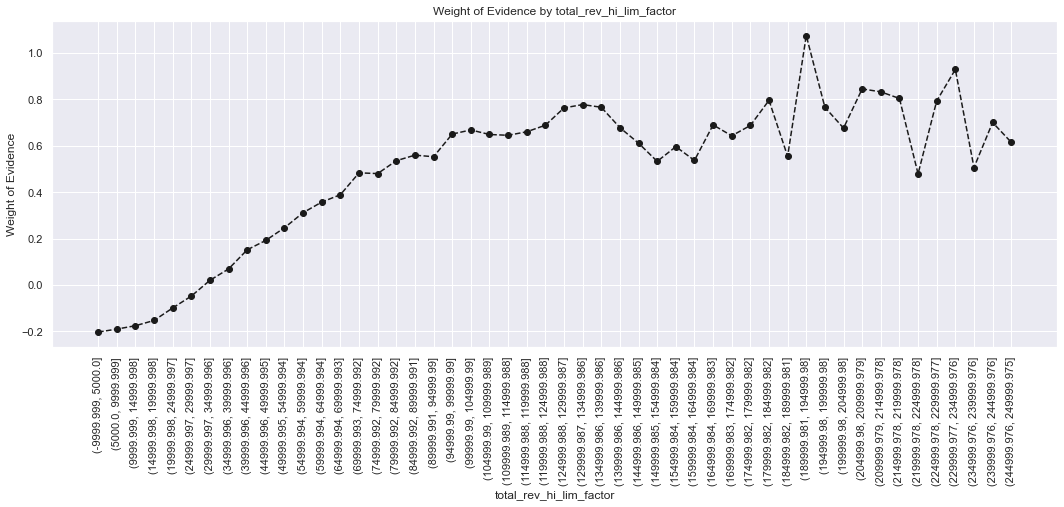

In [110]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [111]:
df_inputs_prepr['total_rev_hi_lim:<=10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

#### annual_inc

In [112]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-110000.0, 2200000.0]",1808373,0.871383,9.999110e-01,1575785.0,232588.0,9.999086e-01,0.999927,-0.000018,NaN,NaN,inf
1,"(2200000.0, 4400000.0]",67,0.880597,3.704658e-05,59.0,8.0,3.743823e-05,0.000034,0.084837,0.009214,0.084856,inf
2,"(4400000.0, 6600000.0]",47,0.914894,2.598790e-05,43.0,4.0,2.728549e-05,0.000017,0.461647,0.034297,0.376810,inf
3,"(6600000.0, 8800000.0]",31,0.935484,1.714096e-05,29.0,2.0,1.840184e-05,0.000009,0.760890,0.020590,0.299243,inf
4,"(8800000.0, 11000000.0]",15,0.800000,8.294011e-06,12.0,3.0,7.614556e-06,0.000013,-0.526964,0.135484,1.287854,inf
5,"(11000000.0, 13200000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(13200000.0, 15400000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(15400000.0, 17600000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(17600000.0, 19800000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(19800000.0, 22000000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [113]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

#### mths_since_last_delinq

In [114]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-114-61a345123922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.202, 4.04]",38603,0.850556,0.043773,32834.0,5769.0,0.043079,0.048194,-0.112209,NaN,NaN,inf
1,"(4.04, 8.08]",62022,0.853294,0.070329,52923.0,9099.0,0.069436,0.076013,-0.090501,0.002738,0.021708,inf
2,"(8.08, 12.12]",63789,0.856762,0.072332,54652.0,9137.0,0.071704,0.076331,-0.062521,0.003468,0.027980,inf
3,"(12.12, 16.16]",63102,0.857611,0.071553,54117.0,8985.0,0.071003,0.075061,-0.055582,0.000849,0.006938,inf
4,"(16.16, 20.2]",59670,0.864186,0.067662,51566.0,8104.0,0.067656,0.067701,-0.000670,0.006575,0.054913,inf
5,"(20.2, 24.24]",58338,0.866434,0.066151,50546.0,7792.0,0.066317,0.065094,0.018612,0.002247,0.019281,inf
6,"(24.24, 28.28]",56888,0.864277,0.064507,49167.0,7721.0,0.064508,0.064501,0.000104,0.002156,0.018507,inf
7,"(28.28, 32.32]",53425,0.864445,0.060580,46183.0,7242.0,0.060593,0.060500,0.001540,0.000168,0.001436,inf
8,"(32.32, 36.36]",51043,0.869424,0.057879,44378.0,6665.0,0.058225,0.055679,0.044700,0.004978,0.043160,inf
9,"(36.36, 40.4]",48489,0.867702,0.054983,42074.0,6415.0,0.055202,0.053591,0.029617,0.001722,0.015083,inf


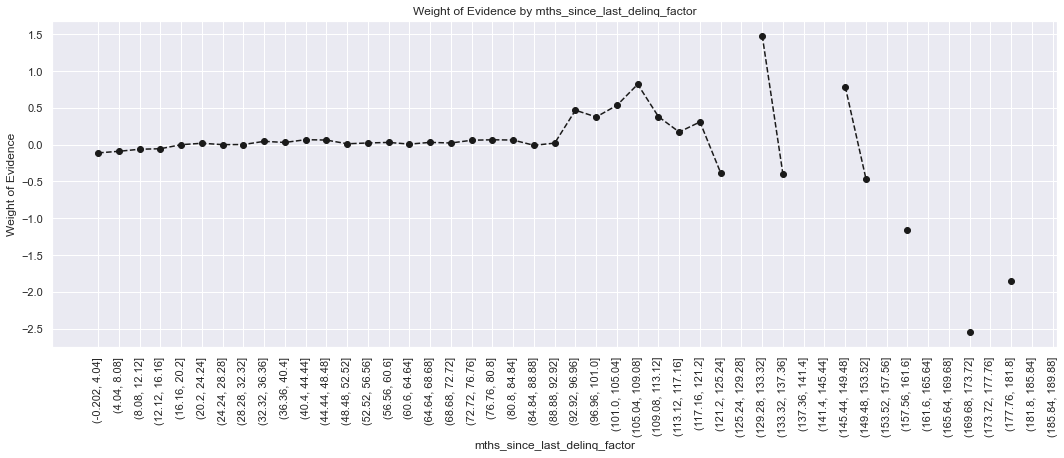

In [115]:
plot_by_woe(df_temp, 90)

In [116]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-20'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_delinq:20-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 20) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:50-80'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 50) & (df_inputs_prepr['mths_since_last_delinq'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=81'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 81), 1, 0)

#### mths_since_last_record

In [117]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-117-8da89b1d64fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1325,0.772075,0.004606,1023.0,302.0,0.004217,0.006704,-0.463649,NaN,NaN,inf
1,"(2.58, 5.16]",914,0.823851,0.003177,753.0,161.0,0.003104,0.003574,-0.141056,0.051776,0.322593,inf
2,"(5.16, 7.74]",851,0.835488,0.002958,711.0,140.0,0.002931,0.003108,-0.058687,0.011636,0.082369,inf
3,"(7.74, 10.32]",1609,0.824114,0.005593,1326.0,283.0,0.005465,0.006282,-0.139242,0.011373,0.080555,inf
4,"(10.32, 12.9]",1169,0.794696,0.004064,929.0,240.0,0.003829,0.005328,-0.330247,0.029418,0.191005,inf
5,"(12.9, 15.48]",1833,0.842881,0.006372,1545.0,288.0,0.006368,0.006393,-0.003898,0.048184,0.326349,inf
6,"(15.48, 18.06]",2032,0.835630,0.007064,1698.0,334.0,0.006999,0.007414,-0.057651,0.007251,0.053753,inf
7,"(18.06, 20.64]",1549,0.836669,0.005385,1296.0,253.0,0.005342,0.005616,-0.050068,0.001039,0.007583,inf
8,"(20.64, 23.22]",2484,0.837359,0.008635,2080.0,404.0,0.008573,0.008968,-0.045009,0.000690,0.005060,inf
9,"(23.22, 25.8]",1879,0.823310,0.006532,1547.0,332.0,0.006376,0.007370,-0.144779,0.014049,0.099770,inf


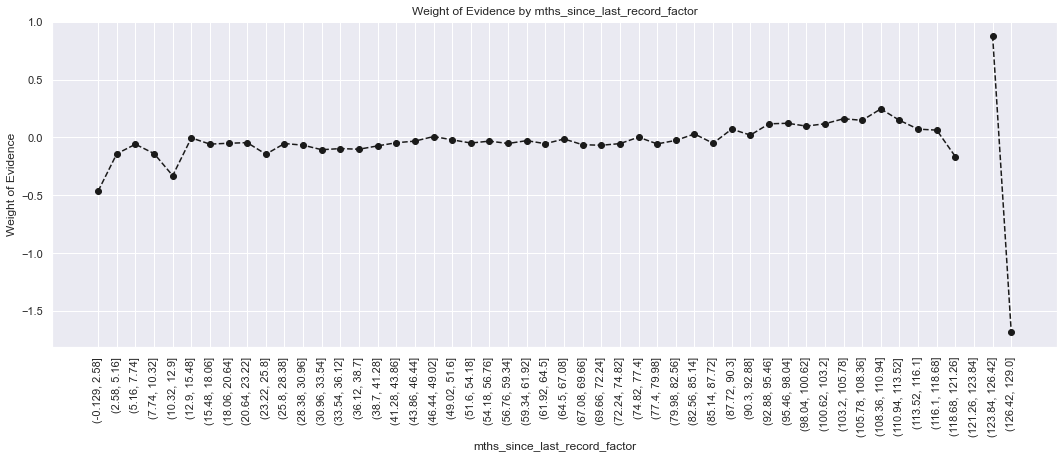

In [118]:
plot_by_woe(df_temp, 90)

In [119]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-37'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 37), 1, 0)
df_inputs_prepr['mths_since_last_record:37-60'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 37) & (df_inputs_prepr['mths_since_last_record'] <= 60), 1, 0)
df_inputs_prepr['mths_since_last_record:61-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 61) & (df_inputs_prepr['mths_since_last_record'] <= 90),1,0)
df_inputs_prepr['mths_since_last_record:>90'] = np.where((df_inputs_prepr['mths_since_last_record'] > 90), 1, 0)

## Preprocessing the Test Dataset

In [120]:
loan_data_inputs_train = df_inputs_prepr
#loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [122]:
#loan_data_inputs_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,addr_state:OH_WI_AZ_MA_UT_DE,addr_state:GA_IL_WY_RI,addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME,purpose:educ__ren_en__sm_b__mov,purpose:med__oth__house__wedd,purpose:major_purch__vacation__home_impr__car,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<30,mths_since_issue_d:30-33,mths_since_issue_d:33-40,mths_since_issue_d:41-46,mths_since_issue_d:46-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.582,int_rate:15.582-19.177,int_rate:>19.177,funded_amnt_factor,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<167,mths_since_earliest_cr_line:167-250,mths_since_earliest_cr_line:251-355,mths_since_earliest_cr_line:356-417,mths_since_earliest_cr_line:>417,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mth

KeyError: "['member_id' 'pymnt_plan'] not found in axis"